<a href="https://colab.research.google.com/github/harshitha24bad034-tech/ML_assign_EX_4/blob/main/exp4_scenario1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print("Harshitha 24BAD034")
from google.colab import files
uploaded = files.upload()

Harshitha 24BAD034


Saving spam.csv to spam.csv


In [8]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import kagglehub
import os

df = pd.read_csv("spam.csv", encoding='latin1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from collections import Counter


In [11]:
nltk.download('stopwords')
df = df.iloc[:, :2]
df.columns = ["label", "text"]
df = df.drop(df.index[0]).reset_index(drop=True)
df['text'] = df['text'].fillna('')

stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
def clean_text(text):
    text = text.lower()
    text = "".join([c for c in text if c not in string.punctuation])
    words = [w for w in text.split() if w not in stop_words]
    return " ".join(words)

df["clean_text"] = df["text"].apply(clean_text)

In [13]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["clean_text"])

encoder = LabelEncoder()
y = encoder.fit_transform(df["label"])


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [15]:
model = MultinomialNB(alpha=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [16]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))


Accuracy : 0.9741564967695621
Precision: 0.875
Recall   : 0.9408602150537635
F1 Score : 0.9067357512953368


In [17]:
mis_idx = np.where(y_test != y_pred)[0][:5]
for i in mis_idx:
    print(df["text"].iloc[i],
          encoder.inverse_transform([y_test[i]])[0],
          encoder.inverse_transform([y_pred[i]])[0])

Havent planning to buy later. I check already lido only got 530 show in e afternoon. U finish work already? ham spam
Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country the Algarve is in? Txt ansr to 82277. å£1.50 SP:Tyrone ham spam
Want 2 get laid tonight? Want real Dogging locations sent direct 2 ur mob? Join the UK's largest Dogging Network bt Txting GRAVEL to 69888! Nt. ec2a. 31p.msg@150p spam ham
Got c... I lazy to type... I forgot Ì_ in lect... I saw a pouch but like not v nice... ham spam
Yes see ya not on the dot ham spam


In [18]:
for a in [0.1, 1, 5]:
    m = MultinomialNB(alpha=a)
    m.fit(X_train, y_train)
    print(a, m.score(X_test, y_test))


0.1 0.9691313711414213
1 0.9741564967695621
5 0.9777458722182341


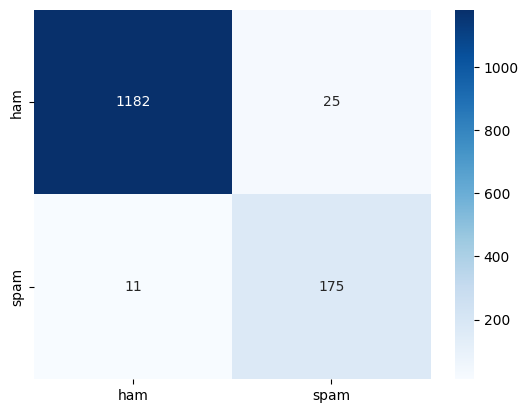

In [19]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.show()

In [20]:
features = vectorizer.get_feature_names_out()
top_spam = np.argsort(model.feature_log_prob_[1])[-10:]
print(features[top_spam])

spam_words = " ".join(df[df["label"] == "spam"]["clean_text"]).split()
ham_words  = " ".join(df[df["label"] == "ham"]["clean_text"]).split()

print(Counter(spam_words).most_common(10))
print(Counter(ham_words).most_common(10))

['prize' 'reply' 'text' 'claim' 'mobile' 'stop' 'txt' 'ur' 'free' 'call']
[('call', 347), ('free', 215), ('2', 172), ('txt', 149), ('u', 147), ('ur', 144), ('mobile', 123), ('4', 119), ('text', 119), ('claim', 113)]
[('u', 971), ('im', 449), ('2', 305), ('get', 303), ('ltgt', 276), ('ok', 271), ('dont', 257), ('go', 246), ('ur', 240), ('ill', 236)]
